In [28]:
# Read test files
from pyuvdata import UVData
from hera_commissioning_tools import plots, utils
import glob
import os

uv_sum_autos = UVData()
uv_sum = UVData()
uv_diff_autos = UVData()
uv_diff = UVData()

root_dir = os.path.dirname(os.path.abspath("../setup.py"))

uv_sum_autos.read(f'{root_dir}/hera_commissioning_tools/tests/2459710.sum.autos.test.uvh5')
uv_sum.read(f'{root_dir}/hera_commissioning_tools/tests/2459710.sum.test.uvh5')
uv_diff_autos.read(f'{root_dir}/hera_commissioning_tools/tests/2459710.diff.autos.test.uvh5')
uv_diff.read(f'{root_dir}/hera_commissioning_tools/tests/2459710.diff.test.uvh5')

LST values stored in /Users/dstorer/repos/hera_commissioning_tools/hera_commissioning_tools/tests/2459710.sum.autos.test.uvh5 are not self-consistent with time_array and telescope location. Consider recomputing with utils.get_lst_for_time.
LST values stored in /Users/dstorer/repos/hera_commissioning_tools/hera_commissioning_tools/tests/2459710.diff.autos.test.uvh5 are not self-consistent with time_array and telescope location. Consider recomputing with utils.get_lst_for_time.


In [48]:
import importlib
importlib.reload(utils)
importlib.reload(plots)

<module 'hera_commissioning_tools.plots' from '/Users/dstorer/repos/hera_commissioning_tools/hera_commissioning_tools/plots.py'>

## plot_autos

Plot spectra for a single time (default is the middle index of the time array), organized by node, and within that by SNAP and SNAP input. Heading colors and abbreviations indicate antenna apriori status.

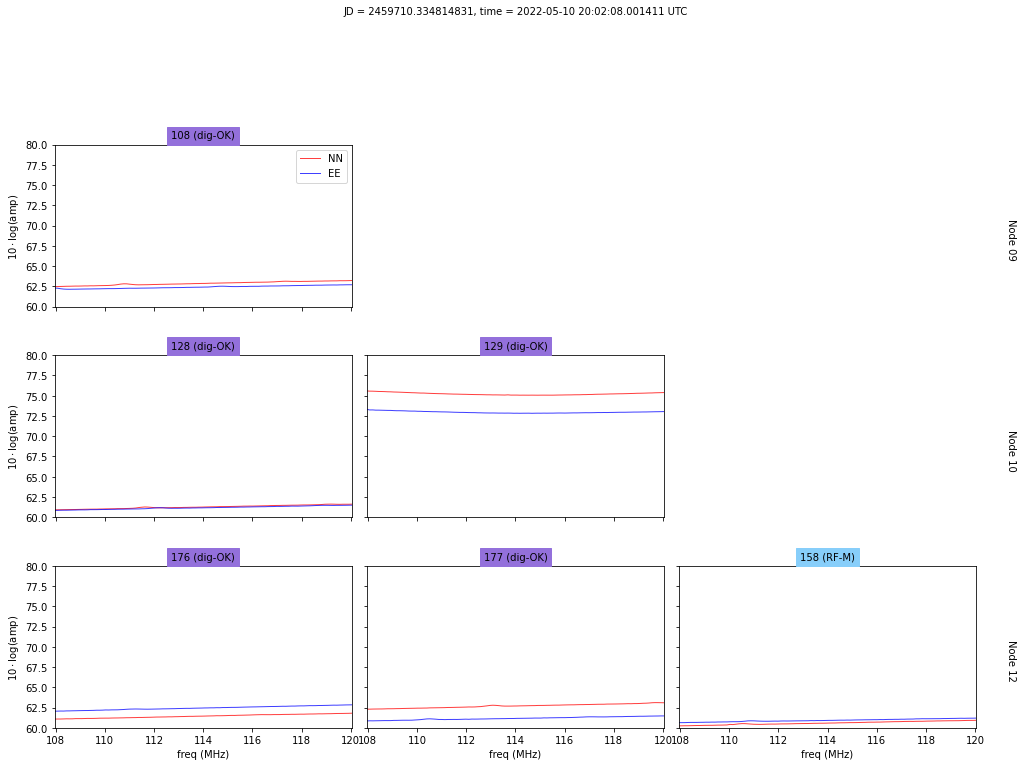

In [49]:
plots.plot_autos(uv_sum_autos)

## plot_wfs

Plot waterfalls of time versus frequency for all given antennas, organized by node, and within that by SNAP and SNAP input. Heading colors and abbreviations indicate antenna apriori status.

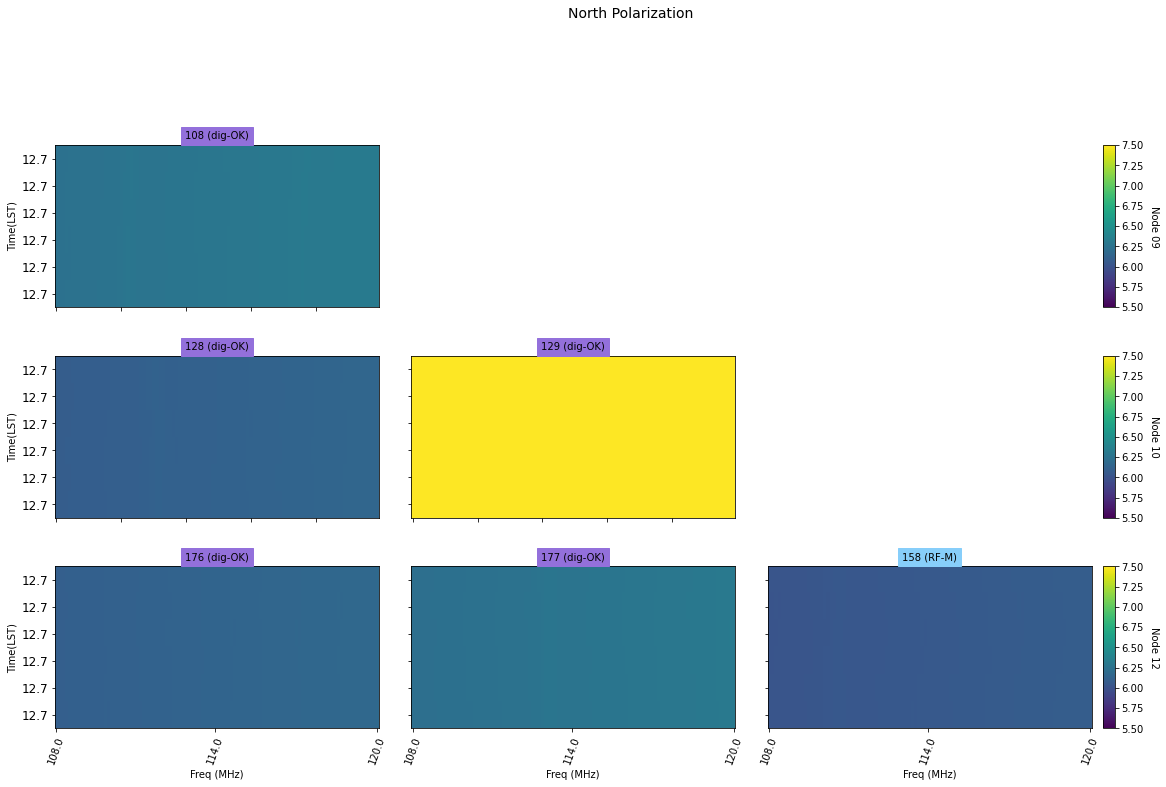

In [45]:
plots.plot_wfs(uv_sum_autos,pol=0,dtype='load')

## auto_waterfall_lineplot

Plot a detailed view of an individual antenna - this displays waterfalls of time versus frequency for both polarizations, along with spectra of an individual time slice and spectra of the average across all times.

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


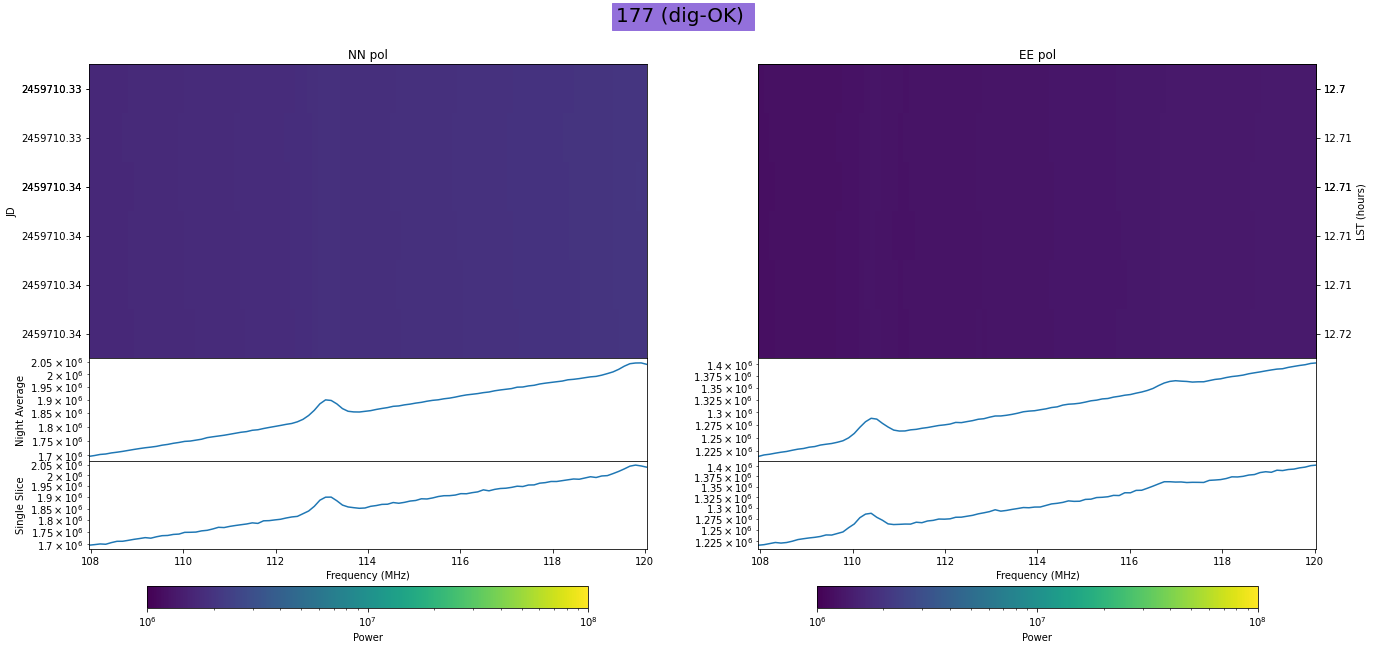

In [53]:
plots.auto_waterfall_lineplot(uv_sum_autos,177)